![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Quick Flux Processing Chain
</b>
</span>

---
**Notebook version**: `1` (5 Feb 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

# Description

- quick (simplified) version of the flux processing chain
- uses a lot of default values, which means not a lot of user input is needed
- recommended to quickly check on current data
- produces data up to Level-3.2
- for more info about flux levels see [Flux Processing Chain](https://www.swissfluxnet.ethz.ch/index.php/data/ecosystem-fluxes/flux-processing-chain/)

# Settings

In [6]:
FLUXVARS = ['FC', 'LE', 'H']  # Name of the flux variable in fluxnet output files: FC, FH2O, LE, ET, H, FN2O, FCH4; must be given as list even if there is only one variable
SOURCEDIRS = [r'F:\TMP\FRU']  # Folders where the EddyPro output files are located
SITE_LAT = 47.115833  # Latitude of site
SITE_LON = 8.537778  # Longitude of site
FILETYPE = 'EDDYPRO-FLUXNET-CSV-30MIN'  # Filetype of EddyPro output files, can be 'EDDYPRO-FLUXNET-CSV-30MIN' or 'EDDYPRO-FULL-OUTPUT-CSV-30MIN'
UTC_OFFSET = 1  # Time stamp offset in relation to UTC, e.g. 1 for UTC+01:00 (CET), important for the calculation of potential radiation for detecting daytime and nighttime
NIGHTTIME_THRESHOLD = 50  # Threshold for potential radiation in W m-2, conditions below threshold are nighttime
DAYTIME_ACCEPT_QCF_BELOW = 2
NIGHTTIMETIME_ACCEPT_QCF_BELOW = 2

# Imports

In [7]:
import importlib.metadata
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from diive.pkgs.fluxprocessingchain.fluxprocessingchain import QuickFluxProcessingChain
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.78.0


# Run

Found 108 files with extension *.csv and file IDs ['eddypro_', '_fluxnet_']:
 Found file #1: F:\TMP\FRU\eddypro_CH-CHA_FR-20240110-093650_fluxnet_2024-01-10T094618_adv.csv
 Found file #2: F:\TMP\FRU\eddypro_CH-CHA_FR-20240131-094533_fluxnet_2024-01-31T095235_adv.csv
 Found file #3: F:\TMP\FRU\eddypro_CH-CHA_FR-20240215-174523_fluxnet_2024-02-15T175147_adv.csv
 Found file #4: F:\TMP\FRU\eddypro_CH-CHA_FR-20240222-085339_fluxnet_2024-02-22T091631_adv.csv
 Found file #5: F:\TMP\FRU\eddypro_CH-CHA_FR-20240304-120518_fluxnet_2024-03-04T121733_adv.csv
 Found file #6: F:\TMP\FRU\eddypro_CH-CHA_FR-20240312-142226_fluxnet_2024-03-12T142644_adv.csv
 Found file #7: F:\TMP\FRU\eddypro_CH-CHA_FR-20240320-180954_fluxnet_2024-03-20T181428_adv.csv
 Found file #8: F:\TMP\FRU\eddypro_CH-CHA_FR-20240403-101600_fluxnet_2024-04-03T102133_adv.csv
 Found file #9: F:\TMP\FRU\eddypro_CH-CHA_FR-20240411-081002_fluxnet_2024-04-11T081022_adv.csv
 Found file #10: F:\TMP\FRU\eddypro_CH-CHA_FR-20240412-081002_fluxne

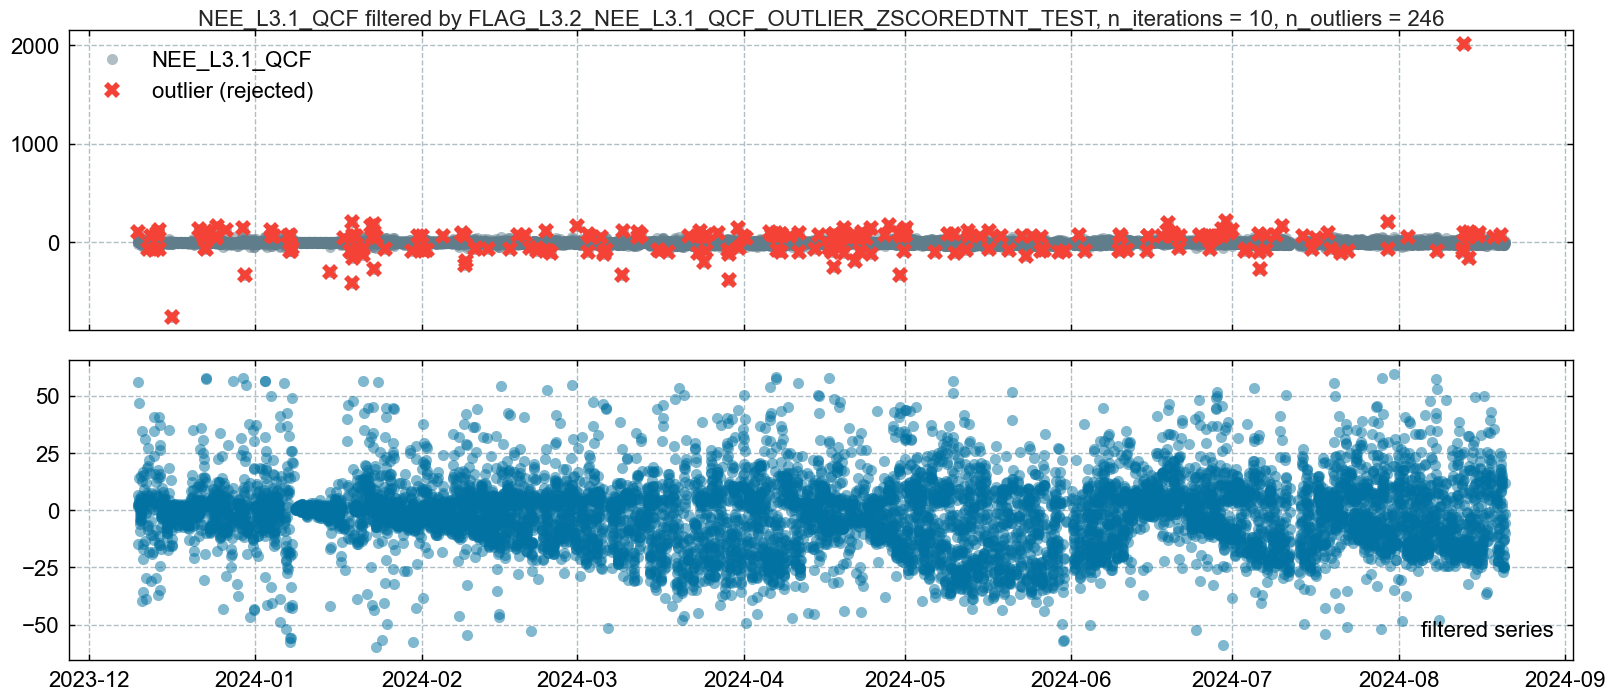

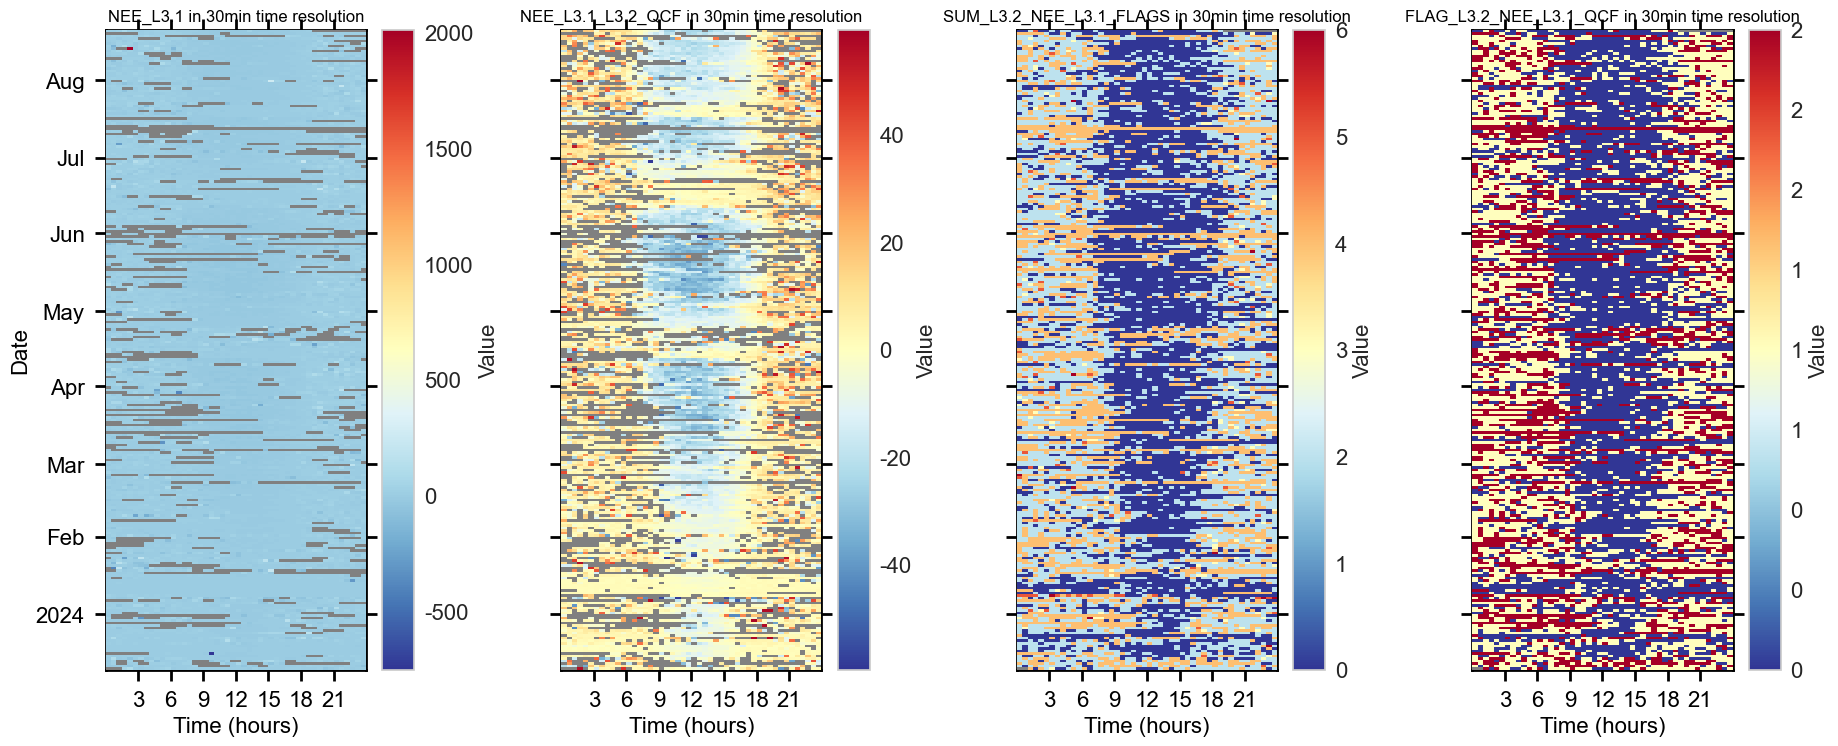

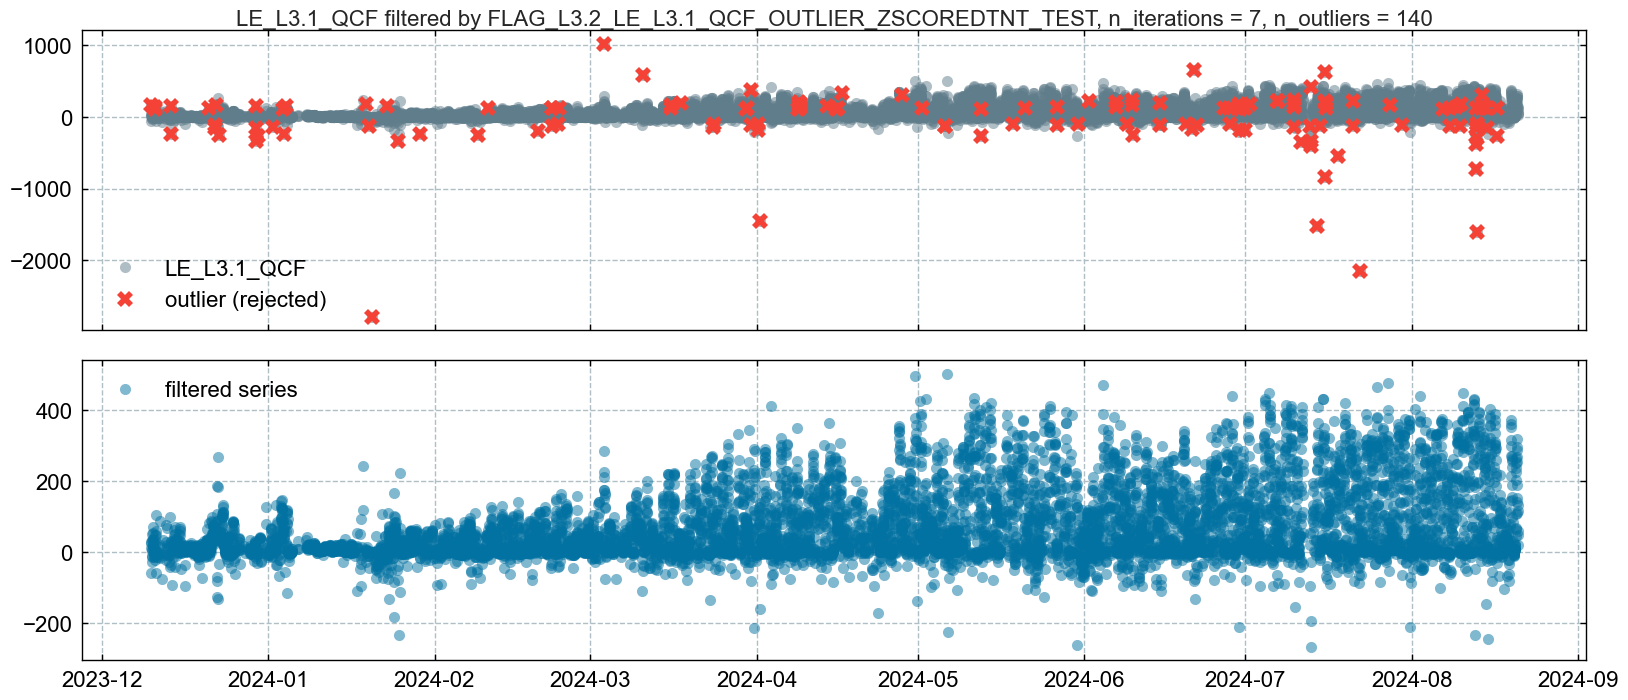

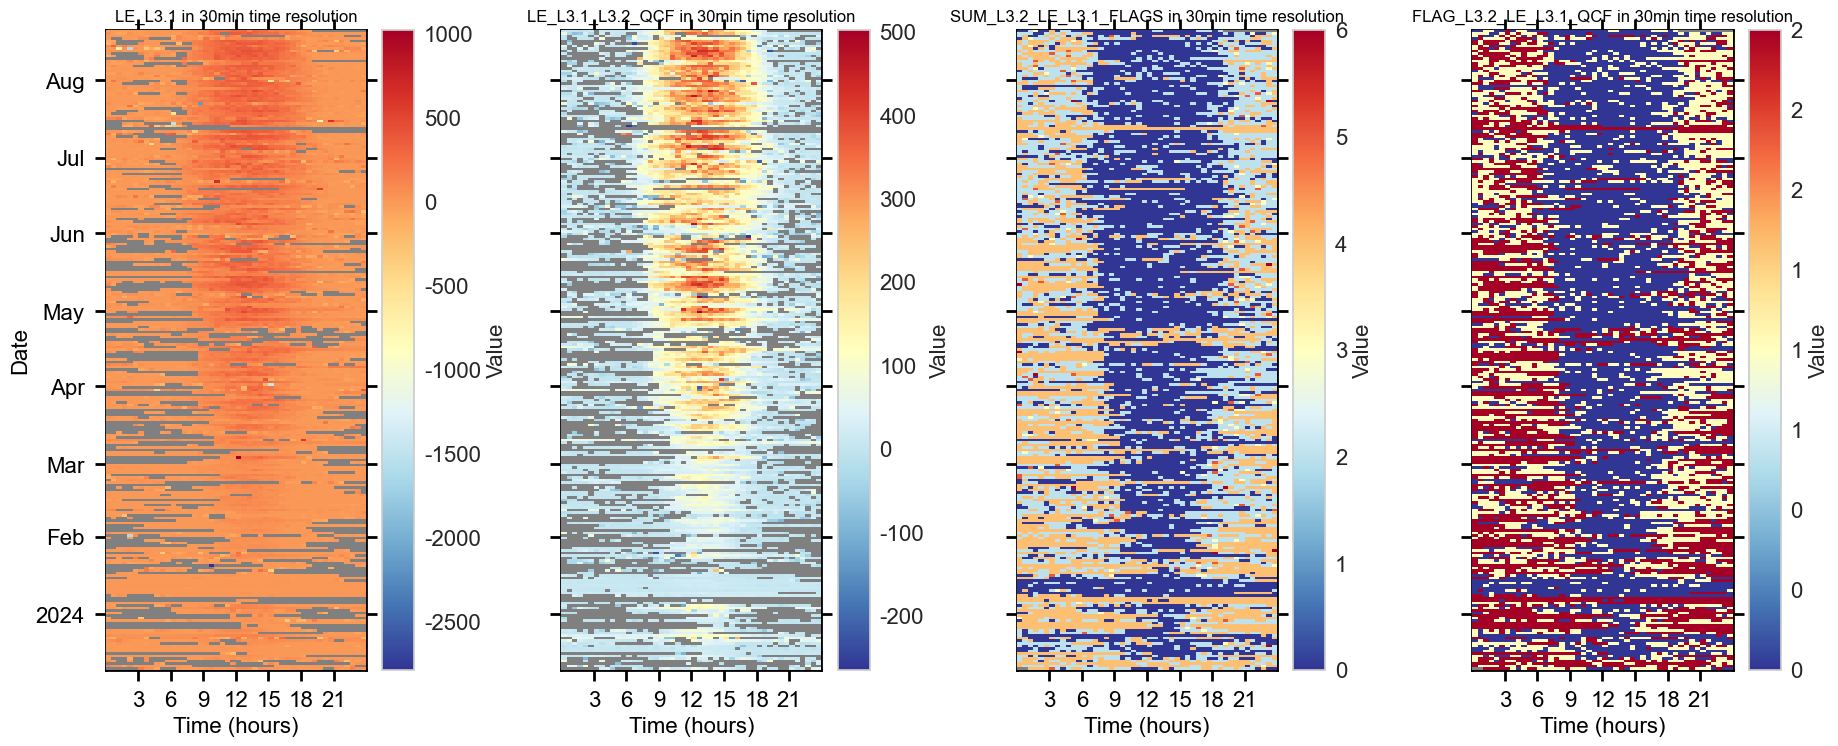

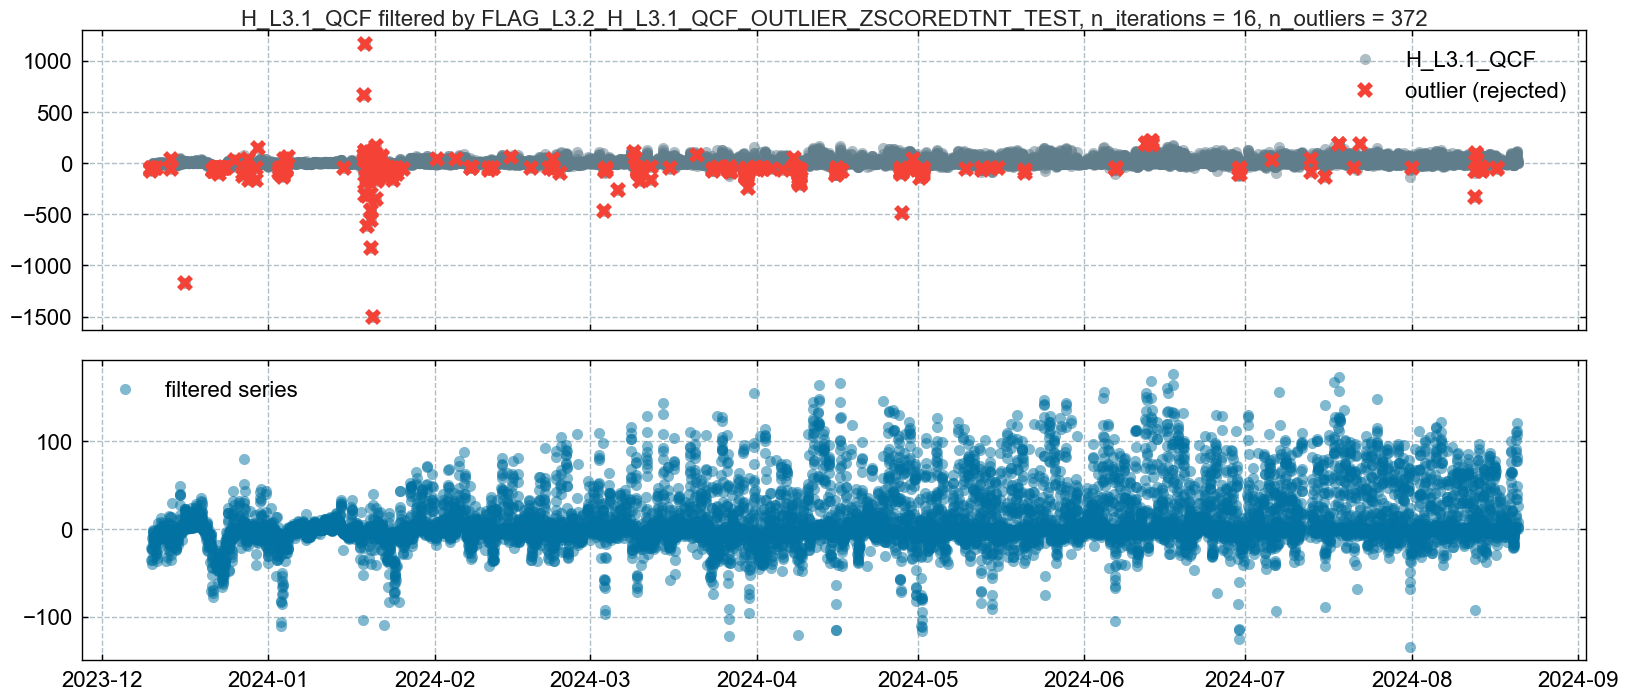

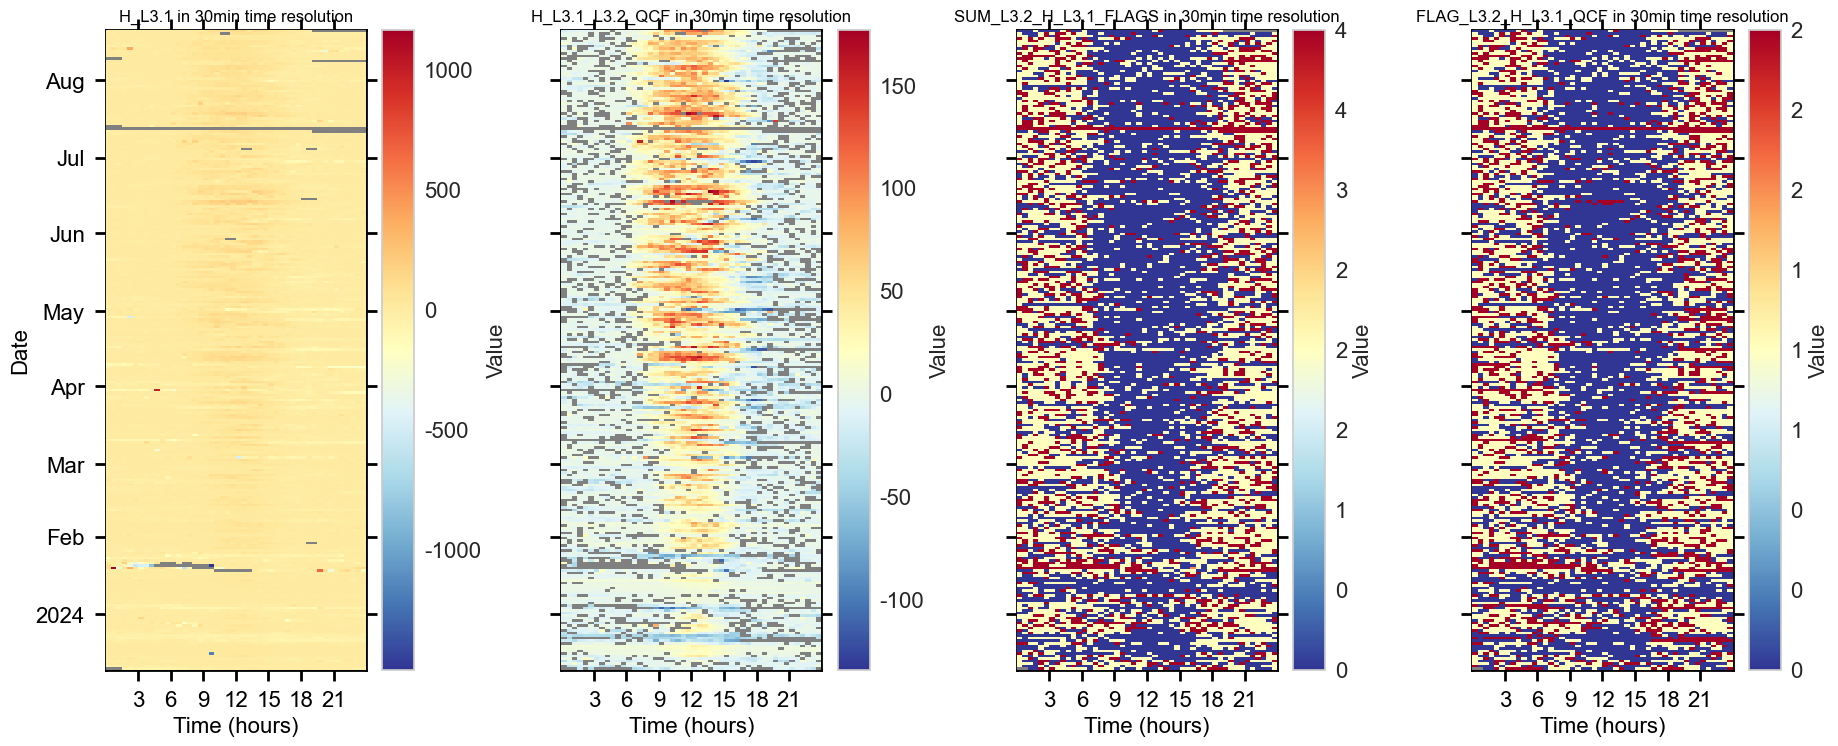

In [8]:
qfpc = QuickFluxProcessingChain(
    fluxvars=FLUXVARS,
    sourcedirs=SOURCEDIRS,
    site_lat=SITE_LAT,
    site_lon=SITE_LON,
    utc_offset=UTC_OFFSET,
    nighttime_threshold=NIGHTTIME_THRESHOLD,
    daytime_accept_qcf_below=DAYTIME_ACCEPT_QCF_BELOW,
    nighttimetime_accept_qcf_below=NIGHTTIMETIME_ACCEPT_QCF_BELOW
)

</br>

In [9]:
quickresults_df =  qfpc.fpc.fpc_df
quickresults_df.head()

,H,SW_IN_POT,DAYTIME,NIGHTTIME,FLAG_L2_H_MISSING_TEST,FLAG_L2_H_SSITC_TEST,...,SUM_L3.2_H_L3.1_HARDFLAGS,SUM_L3.2_H_L3.1_SOFTFLAGS,SUM_L3.2_H_L3.1_FLAGS,FLAG_L3.2_H_L3.1_QCF,H_L3.1_L3.2_QCF,H_L3.1_L3.2_QCF0
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2023-12-10 01:15:00,-29.6752,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN
2023-12-10 01:45:00,-21.4350,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-21.564633,-21.564633
2023-12-10 02:15:00,-81.0673,0.0,0.0,1.0,0.0,1.0,...,2.0,2.0,4.0,2.0,NaN,NaN
2023-12-10 02:45:00,-35.0905,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,1.0,-34.851264,NaN
2023-12-10 03:15:00,-53.5843,0.0,0.0,1.0,0.0,1.0,...,2.0,2.0,4.0,2.0,NaN,NaN


</br>

# **End of notebook**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2024-08-21 13:40:10
